# 1- DATA INFO

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv("/content/drive/MyDrive/MY PROJECT/HEPSİBURADA PROJE/hepsiburada_phone_2.csv")

In [4]:
df.head(10)

,Unnamed: 0,name,ram,memory,screen_size,power,front_camera,rear_camera,price
0,0,Samsung Galaxy M12 64 GB (Samsung Türkiye Gara...,4,64,"6,5",5000.0,"8,0",48 + 2 + 2 + 2,2999
1,1,Samsung Galaxy M12 128 GB (Samsung Türkiye Gar...,4,128,"6,5",5000.0,"8,0",48 + 2 + 2 + 2,3249
2,2,Oppo A15s 64 GB (Oppo Türkiye Garantili),4,64,"6,52",4230.0,"8,0",13 + 2 + 2,2749
3,3,Oppo Reno 5 Lite 128 GB (Oppo Türkiye Garantili),8,128,"6,4",4310.0,32,48 + 8 + 2 + 2,4655
4,4,Oppo A74 128 GB (Oppo Türkiye Garantili),4,128,"6,43",5000.0,16,48 + 2,3984
5,5,Samsung Galaxy M52 5G 128 GB (Samsung Türkiye ...,8,128,"6,7",5000.0,32,64 + 13 + 5,5349
6,6,Xiaomi Redmi 9c 64 GB (Xiaomi Türkiye Garantili),3,64,"6,53",5000.0,5,13,2692
7,7,Reeder P13 Blue 16 GB 3 GB RAM (Reeder Türkiye...,3,16,"6,08",4080.0,5,8,1349
8,8,Reeder P13 Blue Max L 2021 64 GB (Reeder Türki...,4,64,"6,26",3800.0,5,8,1598
9,9,iPhone 11 128 GB,4,128,"6,1",3110.0,12,12 + 12,12199


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1193 non-null   int64  
 1   name          1193 non-null   object 
 2   ram           1153 non-null   object 
 3   memory        1151 non-null   object 
 4   screen_size   1183 non-null   object 
 5   power         1145 non-null   float64
 6   front_camera  1149 non-null   object 
 7   rear_camera   1184 non-null   object 
 8   price         1193 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 84.0+ KB


In [6]:
df.isnull().sum()

Unnamed: 0       0
name             0
ram             40
memory          42
screen_size     10
power           48
front_camera    44
rear_camera      9
price            0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,power,price
count,1193.000000,1145.000000,1193.000000
mean,596.000000,4176.664629,6282.108131
std,344.533743,1029.994830,5370.978170
min,0.000000,400.000000,220.000000
25%,298.000000,3500.000000,2692.000000
50%,596.000000,4500.000000,4655.000000
75%,894.000000,5000.000000,7693.000000
max,1192.000000,7000.000000,35399.000000


# 2- DATA EXPLORATION

In [8]:
df1 = df.copy()

## 2.1 URETICI ISIMLERİ DUZENLEME

In [9]:
manufacturer = df1['name'].apply(lambda x: x.split(' ')[0])
manufacturer

0       Samsung
1       Samsung
2          Oppo
3          Oppo
4          Oppo
         ...   
1188     iPhone
1189     iPhone
1190    Samsung
1191     Realme
1192     Reeder
Name: name, Length: 1193, dtype: object

In [10]:
len(manufacturer)

1193

In [11]:
# isimleri değiştiriyorum
#df1.drop(columns=['name'], axis=1, inplace=True)
df1.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [12]:
df1.drop(columns=["name"], axis=1, inplace=True)

In [13]:
#yeni kolonu ekleme

df1.insert(0, "manufacturer", manufacturer)

In [14]:
df1.head()

,manufacturer,ram,memory,screen_size,power,front_camera,rear_camera,price
0,Samsung,4,64,"6,5",5000.0,"8,0",48 + 2 + 2 + 2,2999
1,Samsung,4,128,"6,5",5000.0,"8,0",48 + 2 + 2 + 2,3249
2,Oppo,4,64,"6,52",4230.0,"8,0",13 + 2 + 2,2749
3,Oppo,8,128,"6,4",4310.0,32,48 + 8 + 2 + 2,4655
4,Oppo,4,128,"6,43",5000.0,16,48 + 2,3984


In [15]:
# hangi üreticin kaç adet ürünü var

df1.groupby(by="manufacturer").count()

,ram,memory,screen_size,power,front_camera,rear_camera,price
manufacturer,,,,,,,
Alcatel,7,7,7,7,7,7,7
Anka,1,1,1,1,1,1,1
Apple,1,1,1,1,1,1,1
BB,3,3,3,3,3,3,4
Blackberry,3,1,6,0,0,6,6
Casper,14,14,14,14,14,14,14
Doogee,1,1,1,1,1,1,1
Elephone,3,3,3,3,3,3,3
General,24,24,24,24,24,24,24


## 2.2 RAM DÜZENLEME

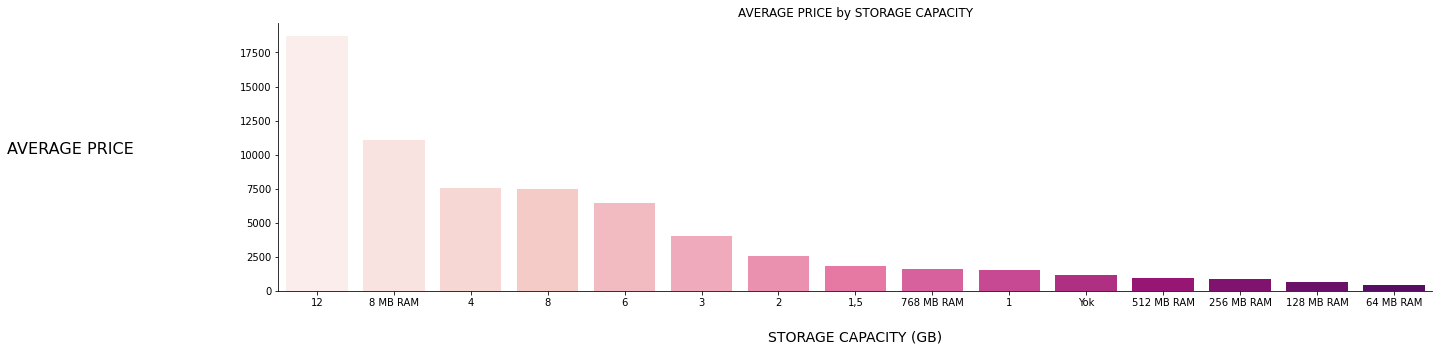

In [16]:
df1_REM = df.groupby("ram")[["price"]].agg({'price': 'mean'}).sort_values("price" , ascending = False)

fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x=df1_REM.index , y= 'price' ,data=df1_REM , ax=ax , palette="RdPu" )
ax.set_title('AVERAGE PRICE by STORAGE CAPACITY')
ax.set_ylabel('AVERAGE PRICE' ,rotation = 0 , fontsize=16)
ax.set_xlabel('STORAGE CAPACITY (GB)',fontsize=14)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig('name1.png', dpi=200, transparent=True)

In [17]:
df_8mb = df1.loc[lambda df1: df1['ram'] == "8 MB RAM"]
df_768mb = df1.loc[lambda df1: df1['ram'] == "768 MB RAM"]
df_512_MB = df1.loc[lambda df1: df1['ram'] == "512 MB RAM"]
df_256_MB = df1.loc[lambda df1: df1['ram'] == "256 MB RAM"]
df_128_MB = df1.loc[lambda df1: df1['ram'] == "128 MB RAM"]
df_64_MB = df1.loc[lambda df1: df1['ram'] == "64 MB RAM"]

In [18]:
df1 = df1[df1.ram != "64 MB RAM"	]
df1 = df1[df1.ram != "128 MB RAM"	]
df1 = df1[df1.ram != "256 MB RAM"	]
df1 = df1[df1.ram != "512 MB RAM"	]
df1 = df1[df1.ram != "768 MB RAM"	]

In [19]:
df1 = df1[df1.ram != "1,5"	]

In [20]:
df1['ram'] = df1['ram'].str.replace(' MB RAM', '')

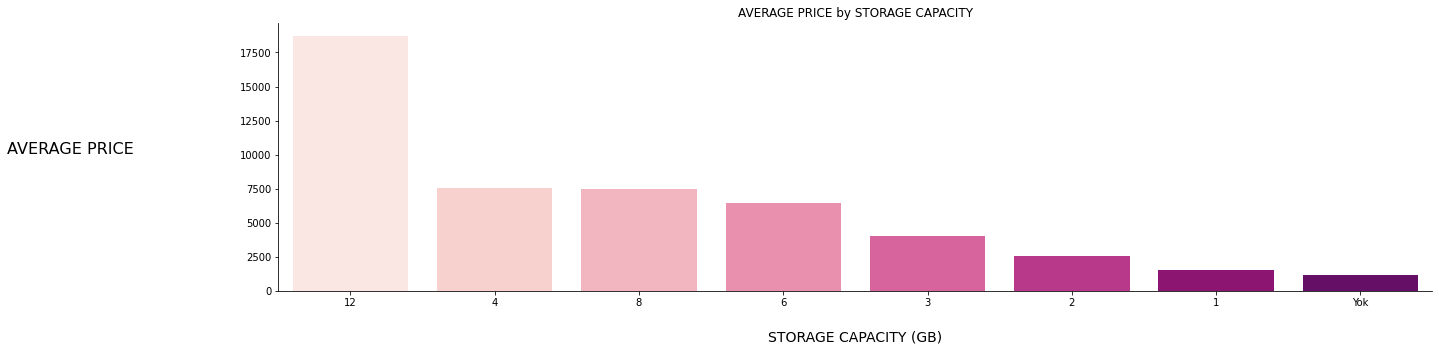

In [21]:
df1_REM = df1.groupby("ram")[["price"]].agg({'price': 'mean'}).sort_values("price" , ascending = False)

fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x=df1_REM.index , y= 'price' ,data=df1_REM , ax=ax , palette="RdPu" )
ax.set_title('AVERAGE PRICE by STORAGE CAPACITY')
ax.set_ylabel('AVERAGE PRICE' ,rotation = 0 , fontsize=16)
ax.set_xlabel('STORAGE CAPACITY (GB)',fontsize=14)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig('name1.png', dpi=200, transparent=True)

## 2.3 EKSİK DEĞERLERİ ATAMA

In [22]:
df1.head(5)

,manufacturer,ram,memory,screen_size,power,front_camera,rear_camera,price
0,Samsung,4,64,"6,5",5000.0,"8,0",48 + 2 + 2 + 2,2999
1,Samsung,4,128,"6,5",5000.0,"8,0",48 + 2 + 2 + 2,3249
2,Oppo,4,64,"6,52",4230.0,"8,0",13 + 2 + 2,2749
3,Oppo,8,128,"6,4",4310.0,32,48 + 8 + 2 + 2,4655
4,Oppo,4,128,"6,43",5000.0,16,48 + 2,3984


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 0 to 1192
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  1178 non-null   object 
 1   ram           1138 non-null   object 
 2   memory        1139 non-null   object 
 3   screen_size   1169 non-null   object 
 4   power         1139 non-null   float64
 5   front_camera  1141 non-null   object 
 6   rear_camera   1169 non-null   object 
 7   price         1178 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 82.8+ KB


In [24]:
df.isnull().sum()

Unnamed: 0       0
name             0
ram             40
memory          42
screen_size     10
power           48
front_camera    44
rear_camera      9
price            0
dtype: int64

### RAM

In [25]:
#Eksik veri miktarı
df1["ram"].isnull().sum() / df1.shape[0] * 100

3.395585738539898

In [26]:
# hangi ram dan kaç tane var yüzde olarak
print(df1["ram"].value_counts() / df1.shape[0] * 100)

4      36.247878
8      19.524618
6      19.439728
3      13.157895
2       5.432937
1       1.018676
12      0.933786
Yok     0.848896
Name: ram, dtype: float64


In [27]:
print(df1["ram"].value_counts())

4      427
8      230
6      229
3      155
2       64
1       12
12      11
Yok     10
Name: ram, dtype: int64


In [28]:
df_ram_yok = df1.loc[lambda df1: df1['ram'] == "Yok"]
df_ram_yok

,manufacturer,ram,memory,screen_size,power,front_camera,rear_camera,price
124,Hiking,Yok,Yok,"2,4",750.0,Yok,"2,0",358
156,Hiking,Yok,Yok,"1,77",800.0,Yok,Yok,268
205,Samsung,Yok,Yok,"1,77",1000.0,Yok,Yok,323
210,Anka,Yok,Yok,"1,8",1200.0,Yok,Yok,453
244,BB,Yok,16 MB,"1,7",800.0,Yok,Yok,239
313,BB,Yok,Yok,"2,7",800.0,Yok,Yok,224
329,Nokia,Yok,110 MB,"1,36",1000.0,Yok,Yok,283
380,Alcatel,Yok,Yok,"1,8",400.0,Yok,"0,08",1615
461,BB,Yok,16 MB,"1,7",800.0,Yok,VGA 640x480 Piksel,293
472,Xiaomi,Yok,Yok,"1,36",1000.0,Yok,"0,08",7707


In [29]:
df1.replace(["110 MB"], 0, inplace=True)
df1.replace(["512 MB"], 0, inplace=True)
df1.replace(["1 TB"], 1000, inplace=True)
df1.replace(["128 MB"], 0, inplace=True)
df1.replace(["16 MB"], 0, inplace=True)

In [30]:
df1.replace(["Yok"], 0, inplace=True)

In [31]:
print(df1["ram"].value_counts())

4     427
8     230
6     229
3     155
2      64
1      12
12     11
0      10
Name: ram, dtype: int64


### FRONT CAMERA

In [32]:
print(df1["front_camera"].value_counts())

8,0                  230
5                    174
12                   169
32                   151
16                   106
20                   100
10                    47
7,0                   46
25                    37
13                    24
0                     14
24                    11
40                     7
20,0                   6
2,0                    4
48 + 8                 3
44                     2
10 + 8                 2
16 + 8                 2
0,3                    1
VGA                    1
50MP + 8MP             1
48 + 8 + 3D Depth      1
13 + 2                 1
24 + 2                 1
Name: front_camera, dtype: int64


In [33]:
df1.replace(["13 + 2"], 15, inplace=True)
df1.replace(["25"], 25, inplace=True)
df1.replace(["VGA"], 0, inplace=True)
df1.replace(["0,3"], 0, inplace=True)
df1.replace(["16 + 8"], 24, inplace=True)
df1.replace(["10 + 8"], 18, inplace=True)
df1.replace(["48 + 8"], 52, inplace=True)
df1.replace(["48 + 8 + 3D Depth"], 60, inplace=True)

In [34]:
df1.replace(["8,0"], 8, inplace=True)
df1.replace(["7,0"], 7, inplace=True)
df1.replace(["20,0"], 20, inplace=True)
df1.replace(["2,0"], 2, inplace=True)
df1.replace(["24 + 2"], 26, inplace=True)

In [35]:
df1.replace(["50MP + 8MP"], 58, inplace=True)

In [36]:
print(df1["front_camera"].value_counts())

8     230
5     174
12    169
32    151
16    106
20    100
10     47
7      46
25     37
13     24
0      16
24     11
40      7
20      6
2       4
52      3
44      2
18      2
24      2
58      1
60      1
15      1
26      1
Name: front_camera, dtype: int64


### REAR CAMERA

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 0 to 1192
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  1178 non-null   object 
 1   ram           1138 non-null   object 
 2   memory        1139 non-null   object 
 3   screen_size   1169 non-null   object 
 4   power         1139 non-null   float64
 5   front_camera  1141 non-null   object 
 6   rear_camera   1169 non-null   object 
 7   price         1178 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 82.8+ KB


In [38]:
print(df1["rear_camera"].value_counts())

12 + 12           163
48 + 8 + 2 + 2    135
8                 106
13                 98
48 + 2 + 2 + 2     61
                 ... 
48 + 13 + 2         1
12 + 2 + 2          1
21                  1
8 + 5 + 2 + 2       1
25 + 8              1
Name: rear_camera, Length: 109, dtype: int64


In [39]:
def convert_and_split(x):
  str_x = str(x)
  splitted_x = str_x.split(" + ")
  return splitted_x

In [40]:
df1['r_c_1'] = df1['rear_camera'].apply(lambda x: convert_and_split(x))

In [41]:
df1.head()

,manufacturer,ram,memory,screen_size,power,front_camera,rear_camera,price,r_c_1
0,Samsung,4,64,"6,5",5000.0,8,48 + 2 + 2 + 2,2999,"[48, 2, 2, 2]"
1,Samsung,4,128,"6,5",5000.0,8,48 + 2 + 2 + 2,3249,"[48, 2, 2, 2]"
2,Oppo,4,64,"6,52",4230.0,8,13 + 2 + 2,2749,"[13, 2, 2]"
3,Oppo,8,128,"6,4",4310.0,32,48 + 8 + 2 + 2,4655,"[48, 8, 2, 2]"
4,Oppo,4,128,"6,43",5000.0,16,48 + 2,3984,"[48, 2]"


In [42]:
df1[['rc1','rc2',"rc3", "rc4"]] = pd.DataFrame(df1.r_c_1.tolist(), index= df1.index)
print (df1)

     manufacturer ram memory screen_size   power front_camera  \
0         Samsung   4     64         6,5  5000.0            8   
1         Samsung   4    128         6,5  5000.0            8   
2            Oppo   4     64        6,52  4230.0            8   
3            Oppo   8    128         6,4  4310.0           32   
4            Oppo   4    128        6,43  5000.0           16   
...           ...  ..    ...         ...     ...          ...   
1188       iPhone   3     64         4,7  1821.0            7   
1189       iPhone   4     64         5,4  2227.0           12   
1190      Samsung   8    128         6,5  4500.0           32   
1191       Realme   2     32         6,5  5000.0            5   
1192       Reeder   6    128         6,5  5380.0            8   

          rear_camera  price           r_c_1 rc1   rc2   rc3   rc4  
0      48 + 2 + 2 + 2   2999   [48, 2, 2, 2]  48     2     2     2  
1      48 + 2 + 2 + 2   3249   [48, 2, 2, 2]  48     2     2     2  
2          1

In [43]:
df1.head()

,manufacturer,ram,memory,screen_size,power,front_camera,rear_camera,price,r_c_1,rc1,rc2,rc3,rc4
0,Samsung,4,64,"6,5",5000.0,8,48 + 2 + 2 + 2,2999,"[48, 2, 2, 2]",48,2,2,2
1,Samsung,4,128,"6,5",5000.0,8,48 + 2 + 2 + 2,3249,"[48, 2, 2, 2]",48,2,2,2
2,Oppo,4,64,"6,52",4230.0,8,13 + 2 + 2,2749,"[13, 2, 2]",13,2,2,None
3,Oppo,8,128,"6,4",4310.0,32,48 + 8 + 2 + 2,4655,"[48, 8, 2, 2]",48,8,2,2
4,Oppo,4,128,"6,43",5000.0,16,48 + 2,3984,"[48, 2]",48,2,None,None


In [44]:
df1.drop(columns=['r_c_1'], axis=1, inplace=True)

In [45]:
df1.drop(columns=['rear_camera'], axis=1, inplace=True)

In [46]:
print(df1["front_camera"].value_counts())

8     230
5     174
12    169
32    151
16    106
20    100
10     47
7      46
25     37
13     24
0      16
24     11
40      7
20      6
2       4
52      3
44      2
18      2
24      2
58      1
60      1
15      1
26      1
Name: front_camera, dtype: int64


In [47]:
df1.rc4.replace(["2MP"], 2, inplace=True)
df1.rc4.replace(["TOF 3D"], 0, inplace=True)

In [48]:
df1.rc3.replace(["2MP"], 2, inplace=True)
df1.rc3.replace(["5MP"], 5, inplace=True)
df1.rc3.replace(["ToF (3D Depth)"], 2, inplace=True)
df1.rc3.replace(["8.0"], 8, inplace=True)

In [49]:
df1.rc2.replace(["5MP"], 5, inplace=True)
df1.rc2.replace(["8MP"], 8, inplace=True)
df1.rc2.replace(["5.0"], 5, inplace=True)

In [50]:
df1.rc1.replace(["48MP"], 48, inplace=True)
df1.rc1.replace(["nan"], 0, inplace=True)
df1.rc1.replace(["0,08"], 0, inplace=True)
df1.rc1.replace(["VGA 640x480 Piksel"], 0, inplace=True)
df1.rc1.replace(["3,15"], 3, inplace=True)
df1.rc1.replace(["13,1"], 13, inplace=True)
df1.rc1.replace(["32"], 32, inplace=True)
df1.rc1.replace(["32.0"], 32, inplace=True)

In [51]:
df1.rc2.replace(["64 +12"], 76, inplace=True)

In [52]:
df1.front_camera.replace(["8+0"], 8, inplace=True)

In [53]:
df1.replace(np.nan,0,inplace=True)

In [54]:
df1.head(30)

,manufacturer,ram,memory,screen_size,power,front_camera,price,rc1,rc2,rc3,rc4
0,Samsung,4,64,"6,5",5000.0,8,2999,48,2,2,2
1,Samsung,4,128,"6,5",5000.0,8,3249,48,2,2,2
2,Oppo,4,64,"6,52",4230.0,8,2749,13,2,2,0
3,Oppo,8,128,"6,4",4310.0,32,4655,48,8,2,2
4,Oppo,4,128,"6,43",5000.0,16,3984,48,2,0,0
5,Samsung,8,128,"6,7",5000.0,32,5349,64,13,5,0
6,Xiaomi,3,64,"6,53",5000.0,5,2692,13,0,0,0
7,Reeder,3,16,"6,08",4080.0,5,1349,8,0,0,0
8,Reeder,4,64,"6,26",3800.0,5,1598,8,0,0,0
9,iPhone,4,128,"6,1",3110.0,12,12199,12,12,0,0


In [55]:
df1.rc1 = df1.rc1.astype("int64")
df1.rc2 = df1.rc2.astype("int64")
df1.rc3 = df1.rc3.astype('int64')
df1.rc4 = df1.rc4.astype("int64")

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 0 to 1192
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  1178 non-null   object 
 1   ram           1178 non-null   object 
 2   memory        1178 non-null   object 
 3   screen_size   1178 non-null   object 
 4   power         1178 non-null   float64
 5   front_camera  1178 non-null   object 
 6   price         1178 non-null   int64  
 7   rc1           1178 non-null   int64  
 8   rc2           1178 non-null   int64  
 9   rc3           1178 non-null   int64  
 10  rc4           1178 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 110.4+ KB


### SCREN SİZE
EKSİK İŞLEM VAR MUTLAKA YAPILMALI

In [57]:
df1.screen_size.replace(["nan"], 0, inplace=True)

In [58]:
print(df1["screen_size"].value_counts())

6,5     269
6,1     140
6,67     90
6,4      82
6,7      55
       ... 
7,6       1
5,9       1
1,43      1
6,82      1
3,5       1
Name: screen_size, Length: 61, dtype: int64


In [59]:
# hangi ram dan kaç tane var yüzde olarak
print(df1["screen_size"].value_counts() / df1.shape[0] * 100)

6,5     22.835314
6,1     11.884550
6,67     7.640068
6,4      6.960951
6,7      4.668930
          ...    
7,6      0.084890
5,9      0.084890
1,43     0.084890
6,82     0.084890
3,5      0.084890
Name: screen_size, Length: 61, dtype: float64


In [60]:
df1['screen_size'] = df1['screen_size'].str.replace(',', '.')

In [61]:
df1['screen_size'] = df1['screen_size'].apply(lambda x: pd.to_numeric(x))

In [62]:
#virgüller noktaya dönüşmüş olmalı
print(df1["screen_size"].value_counts() / df1.shape[0] * 100)

6.50    22.835314
6.10    11.884550
6.67     7.640068
6.40     6.960951
6.70     4.668930
6.53     4.414261
6.52     4.074703
6.20     3.140917
4.70     3.056027
6.43     3.056027
6.26     2.971138
5.40     2.886248
6.08     2.461800
6.80     1.697793
6.60     1.273345
6.30     1.188455
2.40     1.188455
6.55     1.103565
5.50     1.103565
6.47     0.933786
5.70     0.764007
1.80     0.594228
5.00     0.594228
6.00     0.594228
6.21     0.509338
6.22     0.509338
5.80     0.424448
6.39     0.424448
5.71     0.424448
6.90     0.424448
3.20     0.424448
6.09     0.339559
6.51     0.339559
6.44     0.339559
6.18     0.254669
6.01     0.254669
1.36     0.254669
6.57     0.254669
5.20     0.169779
5.99     0.169779
6.58     0.169779
4.50     0.169779
6.59     0.169779
2.20     0.169779
5.84     0.169779
1.70     0.169779
5.45     0.169779
1.77     0.169779
6.95     0.169779
2.70     0.084890
3.00     0.084890
6.78     0.084890
1.43     0.084890
5.30     0.084890
6.41     0.084890
7.60     0

In [63]:
df2 = df1.copy()

data = [df2]
for dataset in data:
    dataset['screen_size'] = dataset['screen_size'].astype(int)
    dataset.loc[ dataset['screen_size'] <= 3.5, 'screen_size'] = 1
    dataset.loc[(dataset['screen_size'] > 3.5) & (dataset['screen_size'] <= 5), 'screen_size'] = 2
    dataset.loc[(dataset['screen_size'] > 5) & (dataset['screen_size'] <= 6),   'screen_size'] = 4
    dataset.loc[(dataset['screen_size'] > 6) & (dataset['screen_size'] <= 7),   'screen_size'] = 5
    dataset.loc[ dataset['screen_size'] > 7, 'screen_size'] = 6

In [64]:
df2.head()

,manufacturer,ram,memory,screen_size,power,front_camera,price,rc1,rc2,rc3,rc4
0,Samsung,4,64,6.50,5000.0,8,2999,48,2,2,2
1,Samsung,4,128,6.50,5000.0,8,3249,48,2,2,2
2,Oppo,4,64,6.52,4230.0,8,2749,13,2,2,0
3,Oppo,8,128,6.40,4310.0,32,4655,48,8,2,2
4,Oppo,4,128,6.43,5000.0,16,3984,48,2,0,0


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 0 to 1192
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  1178 non-null   object 
 1   ram           1178 non-null   object 
 2   memory        1178 non-null   object 
 3   screen_size   1166 non-null   float64
 4   power         1178 non-null   float64
 5   front_camera  1178 non-null   object 
 6   price         1178 non-null   int64  
 7   rc1           1178 non-null   int64  
 8   rc2           1178 non-null   int64  
 9   rc3           1178 non-null   int64  
 10  rc4           1178 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 110.4+ KB


In [66]:
df2.head(10)

,manufacturer,ram,memory,screen_size,power,front_camera,price,rc1,rc2,rc3,rc4
0,Samsung,4,64,6.50,5000.0,8,2999,48,2,2,2
1,Samsung,4,128,6.50,5000.0,8,3249,48,2,2,2
2,Oppo,4,64,6.52,4230.0,8,2749,13,2,2,0
3,Oppo,8,128,6.40,4310.0,32,4655,48,8,2,2
4,Oppo,4,128,6.43,5000.0,16,3984,48,2,0,0
5,Samsung,8,128,6.70,5000.0,32,5349,64,13,5,0
6,Xiaomi,3,64,6.53,5000.0,5,2692,13,0,0,0
7,Reeder,3,16,6.08,4080.0,5,1349,8,0,0,0
8,Reeder,4,64,6.26,3800.0,5,1598,8,0,0,0
9,iPhone,4,128,6.10,3110.0,12,12199,12,12,0,0


In [67]:
df2.front_camera = df2.front_camera.astype("int64")


In [68]:
df2.screen_size.replace(["NaN"], 0, inplace=True)

### MEMORY

In [69]:
print(df2["memory"].value_counts())

128     551
64      332
32       96
256      81
0        52
16       48
512       9
8         7
1000      2
Name: memory, dtype: int64


In [70]:
# hangi ram dan kaç tane var yüzde olarak
print(df2["memory"].value_counts() / df2.shape[0] * 100)

128     46.774194
64      28.183362
32       8.149406
256      6.876061
0        4.414261
16       4.074703
512      0.764007
8        0.594228
1000     0.169779
Name: memory, dtype: float64


In [71]:
# belirli bir kolondaki özellikleri görmek
df2.loc[df2["memory"] == 0]

,manufacturer,ram,memory,screen_size,power,front_camera,price,rc1,rc2,rc3,rc4
74,Samsung,0,0,NaN,0.0,0,254,0,0,0,0
78,Samsung,0,0,1.43,0.0,0,328,0,0,0,0
87,Nokia,0,0,2.40,0.0,0,220,2,0,0,0
98,Nokia,0,0,NaN,0.0,0,489,2,0,0,0
124,Hiking,0,0,2.40,750.0,0,358,2,0,0,0
128,Nokia,0,0,2.20,0.0,0,441,5,0,0,0
156,Hiking,0,0,1.77,800.0,0,268,0,0,0,0
164,Nokia,0,0,2.20,0.0,0,748,5,0,0,0
167,Samsung,4,0,6.40,5000.0,13,4214,48,8,2,2
170,Nokia,0,0,2.40,0.0,0,441,2,0,0,0


In [72]:
# Çok fazla eksik değer var bunun için memeory sıfır olanları drop ediyorum
df2 = df2[df2.memory != 0	]

In [73]:
print(df2["memory"].value_counts())

128     551
64      332
32       96
256      81
16       48
512       9
8         7
1000      2
Name: memory, dtype: int64


In [74]:
df2.memory = df2.memory.astype("int64")

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 0 to 1192
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  1126 non-null   object 
 1   ram           1126 non-null   object 
 2   memory        1126 non-null   int64  
 3   screen_size   1126 non-null   float64
 4   power         1126 non-null   float64
 5   front_camera  1126 non-null   int64  
 6   price         1126 non-null   int64  
 7   rc1           1126 non-null   int64  
 8   rc2           1126 non-null   int64  
 9   rc3           1126 non-null   int64  
 10  rc4           1126 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 105.6+ KB


### RAM

In [76]:
df2.ram = df2.ram.astype("int64")

In [77]:
df2.head(10)

,manufacturer,ram,memory,screen_size,power,front_camera,price,rc1,rc2,rc3,rc4
0,Samsung,4,64,6.50,5000.0,8,2999,48,2,2,2
1,Samsung,4,128,6.50,5000.0,8,3249,48,2,2,2
2,Oppo,4,64,6.52,4230.0,8,2749,13,2,2,0
3,Oppo,8,128,6.40,4310.0,32,4655,48,8,2,2
4,Oppo,4,128,6.43,5000.0,16,3984,48,2,0,0
5,Samsung,8,128,6.70,5000.0,32,5349,64,13,5,0
6,Xiaomi,3,64,6.53,5000.0,5,2692,13,0,0,0
7,Reeder,3,16,6.08,4080.0,5,1349,8,0,0,0
8,Reeder,4,64,6.26,3800.0,5,1598,8,0,0,0
9,iPhone,4,128,6.10,3110.0,12,12199,12,12,0,0


### POWER

In [78]:
print(df2["power"].value_counts())

5000.0    355
4500.0     85
4000.0     78
5160.0     62
3110.0     59
         ... 
2300.0      1
4160.0      1
4350.0      1
2350.0      1
3900.0      1
Name: power, Length: 82, dtype: int64


In [79]:
# hangi ram dan kaç tane var yüzde olarak
print(df2["power"].value_counts() / df2.shape[0] * 100)

5000.0    31.527531
4500.0     7.548845
4000.0     6.927176
5160.0     5.506217
3110.0     5.239787
            ...    
2300.0     0.088810
4160.0     0.088810
4350.0     0.088810
2350.0     0.088810
3900.0     0.088810
Name: power, Length: 82, dtype: float64


data = [df2]
for dataset in data:
    dataset['screen_size'] = dataset['screen_size'].astype(int)
    dataset.loc[ dataset['power'] <= 2000.0, 'power'] = 1
    dataset.loc[(dataset['power'] > 2000.0) & (dataset['power'] <= 3000.0), 'power'] = 2
    dataset.loc[(dataset['power'] > 3000.0) & (dataset['power'] < 4500.0),   'power'] = 4
    dataset.loc[ dataset['power'] >= 4500.0, 'power'] = 5

# DATA BÖLME

In [80]:
df3 = df2.copy()

In [81]:
# Splitting Dataset into train and test set

X = df3.drop(["manufacturer","price"], axis=1)
y = df3["price"]

In [82]:
X.head()

,ram,memory,screen_size,power,front_camera,rc1,rc2,rc3,rc4
0,4,64,6.50,5000.0,8,48,2,2,2
1,4,128,6.50,5000.0,8,48,2,2,2
2,4,64,6.52,4230.0,8,13,2,2,0
3,8,128,6.40,4310.0,32,48,8,2,2
4,4,128,6.43,5000.0,16,48,2,0,0


In [83]:
y.head()

0    2999
1    3249
2    2749
3    4655
4    3984
Name: price, dtype: int64

In [84]:
cols = X.columns

In [85]:
print("X'in boyutu:", X.shape)
print("y'in boyutu:", y.shape)

X'in boyutu: (1126, 9)
y'in boyutu: (1126,)


In [86]:
# y'yi yeniden boyutlandırmamız lazım
# (200, 1) şeklinde

y = y.values.reshape(-1, 1)

In [87]:
# y'in yeni boyutu

print("y'in boyutu:", y.shape)

y'in boyutu: (1126, 1)


# SCALE ETME

In [88]:
X.describe()

,ram,memory,screen_size,power,front_camera,rc1,rc2,rc3,rc4
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000
mean,5.011545,109.250444,6.298135,4218.277975,14.589698,30.275311,8.155417,1.888099,0.760213
std,2.036740,77.325605,0.448372,973.721263,9.469692,23.951185,12.928583,3.054163,1.432715
min,0.000000,8.000000,3.500000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,4.000000,64.000000,6.100000,3600.000000,8.000000,12.000000,0.000000,0.000000,0.000000
50%,4.000000,128.000000,6.500000,4500.000000,12.000000,13.000000,8.000000,0.000000,0.000000
75%,6.000000,128.000000,6.520000,5000.000000,20.000000,48.000000,12.000000,2.000000,2.000000
max,12.000000,1000.000000,7.600000,7000.000000,60.000000,108.000000,76.000000,32.000000,12.000000


In [89]:
scaler = MinMaxScaler()

# scaler'ı train data üzerinde eğitelim ve 
# train datayı scale edelim
X = scaler.fit_transform(X)

In [90]:
type(X)

numpy.ndarray

In [91]:
# datayı DataFrame yapalım tekrar

X = pd.DataFrame(X, columns=[cols])

In [92]:
X.head()

,ram,memory,screen_size,power,front_camera,rc1,rc2,rc3,rc4
0,0.333333,0.056452,0.731707,0.714286,0.133333,0.417476,0.026316,0.0625,0.166667
1,0.333333,0.120968,0.731707,0.714286,0.133333,0.417476,0.026316,0.0625,0.166667
2,0.333333,0.056452,0.736585,0.604286,0.133333,0.077670,0.026316,0.0625,0.000000
3,0.666667,0.120968,0.707317,0.615714,0.533333,0.417476,0.105263,0.0625,0.166667
4,0.333333,0.120968,0.714634,0.714286,0.266667,0.417476,0.026316,0.0000,0.000000


In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv("/content/drive/MyDrive/MY PROJECT/HEPSİBURADA PROJE/hepsiburada_phone_2.csv")


In [96]:
df.head(10)

,Unnamed: 0,name,ram,memory,screen_size,power,front_camera,rear_camera,price
0,0,Samsung Galaxy M12 64 GB (Samsung Türkiye Gara...,4,64,"6,5",5000.0,"8,0",48 + 2 + 2 + 2,2999
1,1,Samsung Galaxy M12 128 GB (Samsung Türkiye Gar...,4,128,"6,5",5000.0,"8,0",48 + 2 + 2 + 2,3249
2,2,Oppo A15s 64 GB (Oppo Türkiye Garantili),4,64,"6,52",4230.0,"8,0",13 + 2 + 2,2749
3,3,Oppo Reno 5 Lite 128 GB (Oppo Türkiye Garantili),8,128,"6,4",4310.0,32,48 + 8 + 2 + 2,4655
4,4,Oppo A74 128 GB (Oppo Türkiye Garantili),4,128,"6,43",5000.0,16,48 + 2,3984
5,5,Samsung Galaxy M52 5G 128 GB (Samsung Türkiye ...,8,128,"6,7",5000.0,32,64 + 13 + 5,5349
6,6,Xiaomi Redmi 9c 64 GB (Xiaomi Türkiye Garantili),3,64,"6,53",5000.0,5,13,2692
7,7,Reeder P13 Blue 16 GB 3 GB RAM (Reeder Türkiye...,3,16,"6,08",4080.0,5,8,1349
8,8,Reeder P13 Blue Max L 2021 64 GB (Reeder Türki...,4,64,"6,26",3800.0,5,8,1598
9,9,iPhone 11 128 GB,4,128,"6,1",3110.0,12,12 + 12,12199


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1193 non-null   int64  
 1   name          1193 non-null   object 
 2   ram           1153 non-null   object 
 3   memory        1151 non-null   object 
 4   screen_size   1183 non-null   object 
 5   power         1145 non-null   float64
 6   front_camera  1149 non-null   object 
 7   rear_camera   1184 non-null   object 
 8   price         1193 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 84.0+ KB


In [98]:
df.isnull().sum()

Unnamed: 0       0
name             0
ram             40
memory          42
screen_size     10
power           48
front_camera    44
rear_camera      9
price            0
dtype: int64

In [99]:
df.describe()

,Unnamed: 0,power,price
count,1193.000000,1145.000000,1193.000000
mean,596.000000,4176.664629,6282.108131
std,344.533743,1029.994830,5370.978170
min,0.000000,400.000000,220.000000
25%,298.000000,3500.000000,2692.000000
50%,596.000000,4500.000000,4655.000000
75%,894.000000,5000.000000,7693.000000
max,1192.000000,7000.000000,35399.000000


# TRAİN TEST

In [100]:
# datayı artık gerçek olarak train-test şeklinde ayırabiliriz
# test size: %20 olsun

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [101]:
X_train.shape

(900, 9)

In [102]:
X_test.shape

(226, 9)

In [103]:
y_train

array([[ 9114],
       [ 3249],
       [ 3984],
       [ 4655],
       [ 5349],
       [ 2749],
       [17817],
       [ 2999],
       [ 3871],
       [ 1349],
       [ 6237],
       [ 7693],
       [ 6654],
       [11199],
       [ 7600],
       [ 3917],
       [ 5999],
       [ 1911],
       [ 2037],
       [ 8819],
       [ 3909],
       [ 4410],
       [ 1349],
       [ 2249],
       [ 3249],
       [ 2692],
       [ 8319],
       [ 3249],
       [ 7899],
       [17817],
       [ 7600],
       [ 5671],
       [ 4663],
       [ 3474],
       [ 4311],
       [ 2703],
       [10290],
       [14993],
       [23600],
       [ 2999],
       [ 2059],
       [ 2999],
       [ 3135],
       [ 2841],
       [17817],
       [ 3234],
       [ 5799],
       [12199],
       [ 2249],
       [15961],
       [ 1349],
       [14993],
       [ 5671],
       [12199],
       [14993],
       [ 2990],
       [ 4655],
       [ 2749],
       [ 3099],
       [ 4663],
       [14993],
       [17817],
       [

In [104]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [105]:
# lineer regresyon nesnesi alalım

lr = LinearRegression()

In [106]:
# lineer regresyon'u veri ile train (fit) edelim

lr.fit(X_train, y_train)

LinearRegression()

# TAHMİN YAP

In [107]:
# tahmin yap

y_pred = lr.predict(X_test)

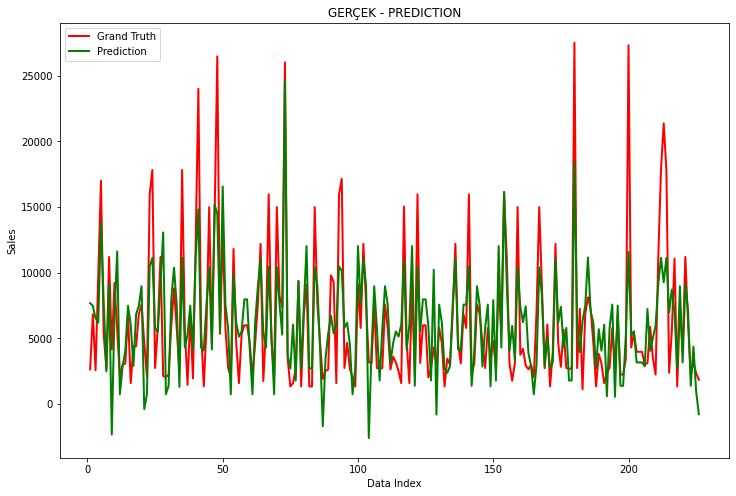

In [108]:
# Her bir tahmin noktasındaki değişimi görelim
indexler = range(1,227)

# Gerçek Data -> Grand Truth
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test, label='Grand Truth', color='red', linewidth=2)

# Tahmin -> Prediction
ax.plot(indexler, y_pred, label='Prediction', color='green', linewidth=2)

plt.title('GERÇEK - PREDICTION')
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

#### 12- Hataları Çiz ($y - \hat y$)

Hata : Residual -> ($y - \hat y$)

**y_test - y_pred**

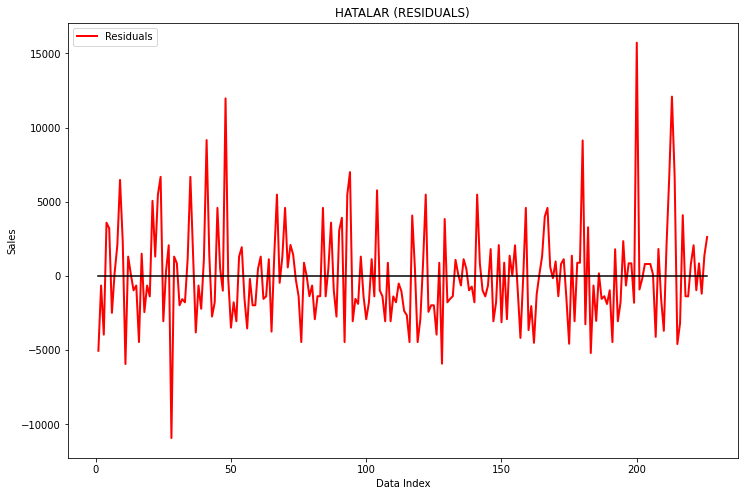

In [109]:
# Her bir tahmin noktasındaki hatayı görelim
indexler = range(1,227)

# Residuls -> Hatalar
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_pred, label='Residuals', color='red', linewidth=2)

# sıfır doğrusunu çiz
ax.plot(indexler, np.zeros(226), color='black')

plt.title('HATALAR (RESIDUALS)')
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

#### 13- Model Doğruluğunu Kontrol Et (RMSE, ve $R^2$)

**RMSE**: Root Mean Squared Error

Daha önce gördüğümüz MSE'nin karekökü aslında.

$R^2$: `coefficient of determination`.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [110]:
# sklearn import

from sklearn.metrics import r2_score, mean_squared_error

In [111]:
# R^2 yi hesaplayalım

r_2 = r2_score(y_test, y_pred)

In [112]:
# R^2 yazdır

print('R^2:', r_2)

R^2: 0.605648088687764


In [113]:
# R^2 % olarak yazdır

print('R^2 %:', r_2 * 100)

R^2 %: 60.564808868776396


In [114]:
# MSE -> RMSE

mse = mean_squared_error(y_test, y_pred)

In [115]:
# MSE'yi yazdır

print('MSE:', mse)

MSE: 10786707.519720858


In [116]:
# RMSE

import math
rmse = math.sqrt(mse)

In [117]:
# RMSE'yi yazdır

print('RMSE:', rmse)

RMSE: 3284.3123358963376


https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

# Ridge

In [118]:
from sklearn.model_selection import train_test_split ,cross_val_score , KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV , ElasticNet
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [119]:
ridge_model = Ridge()
ridge_model.fit(X, y)

Ridge()

In [120]:
print(f'Ridge Regression Test Data R^2: {ridge_model.score(X_test, y_test):.3f}')

Ridge Regression Test Data R^2: 0.603


In [121]:
y_pred = ridge_model.predict(X_test)
print(f'Ridge Regression Test Data MSE: {np.mean((y_pred - y_test)**2):.3f}')

Ridge Regression Test Data MSE: 10861311.592


#Lasso

In [122]:
lasso_model = Lasso()
lasso_model.fit(X, y)

Lasso()

In [123]:
print(f'Lasso Regression Test Data R^2: {lasso_model.score(X_test, y_test):.3f}')

Lasso Regression Test Data R^2: 0.613


In [124]:
y_pred = lasso_model.predict(X_test)
print(f'Lasso Regression Test Data MSE: {np.mean((y_pred - y_test)**2):.3f}')

Lasso Regression Test Data MSE: 42422618.652


# Elasticnet

In [125]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X, y)

ElasticNet()

In [126]:
print(f'ElasticNet Regression Test Data R^2: {elasticnet_model.score(X_test, y_test):.3f}')

ElasticNet Regression Test Data R^2: 0.041


In [127]:
y_pred = elasticnet_model.predict(X_test)
print(f'ElasticNet Regression Test Data MSE: {np.mean((y_pred - y_test)**2):.3f}')

ElasticNet Regression Test Data MSE: 27511761.295


# OLS Analizi:

In [128]:
# OLS için kopyalayalım

OLS_Model = X_train.copy()

In [129]:
# statsmodels için add_constant -> beta_0 için 1'lerden oluşan sütun

OLS_Model = sm.add_constant(OLS_Model)

In [130]:
# OLS çalıştıralım

lr = sm.OLS(y_train, OLS_Model).fit()

In [131]:
# özeti görelim

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     188.0
Date:                Sun, 05 Jun 2022   Prob (F-statistic):          5.31e-199
Time:                        13:28:02   Log-Likelihood:                -8528.6
No. Observations:                 900   AIC:                         1.708e+04
Df Residuals:                     890   BIC:                         1.713e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.15e+04    742.29